# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
# print first 5 rows of the dataset
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# print last 5 rows of the dataset
parkinsons_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
# number of rows and columns in the dataset
parkinsons_data.shape

(195, 24)

In [6]:
# getting information about the data
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# checking for missing values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# analyzing the data
# statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# checking the distribution of target variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

# 0-->Parkinson's Negative 1-->parkinson's Positive


# Splitting The Features and Target

In [10]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [11]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


# Splitting the Data into Training Data and Testing Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [15]:
print(X_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
123      182.018       197.173        79.187         0.00842   
160      114.238       124.393        77.022         0.00581   
94       157.821       172.975        68.401         0.00358   
57       117.274       129.916       110.402         0.00752   
41       184.055       196.537       166.977         0.00258   
..           ...           ...           ...             ...   
43       241.404       248.834       232.483         0.00281   
22       167.930       193.221        79.068         0.00442   
72       120.080       139.710       111.208         0.00405   
15       142.167       217.455        83.159         0.00369   
168      197.569       217.627        90.794         0.00803   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
123           0.00005   0.00506   0.00449     0.01517       0.02503   
160           0.00005   0.00299   0.00316     0.00896       0.04009   
94            0.00

In [16]:
print(X_test)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
10        88.333       112.240        84.072         0.00505   
79       100.770       115.697        85.545         0.01038   
164      102.273       142.830        85.902         0.00907   
142      198.458       219.290       148.691         0.00376   
186      116.556       592.030        86.228         0.00496   
133      118.747       123.723       109.836         0.00331   
35       201.464       210.565       195.708         0.00198   
137      113.166       130.270       100.673         0.00502   
25       104.400       206.002        77.968         0.00633   
2        116.682       131.111       111.555         0.01050   
12       136.926       159.866       131.276         0.00293   
128      119.031       127.533       109.216         0.00440   
144      202.544       241.350       164.168         0.00254   
3        116.676       137.871       111.366         0.00997   
48       122.188       128.611       115

# Training Model 1: Support Vector Machine

In [17]:
suvmac = svm.SVC(kernel="linear")

In [18]:
suvmac.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation And Accuracy Score

In [19]:
# accuracy score in training data
X_train_prediction = suvmac.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [20]:
print('Accuracy score of training data : ', training_data_accuracy * 100)

Accuracy score of training data :  87.17948717948718


In [21]:
# accuracy score in testing data
X_test_prediction = suvmac.predict(X_test)
test_data_accuracy1 = accuracy_score(Y_test, X_test_prediction)

In [22]:
print('Accuracy score of test data : ', test_data_accuracy1 * 100)

Accuracy score of test data :  87.17948717948718


In [23]:
cr1 = suvmac.predict(X_test)
print(classification_report(Y_test, cr1))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



In [24]:
confusion_matrix(X_test_prediction, Y_test)

array([[ 4,  1],
       [ 4, 30]], dtype=int64)

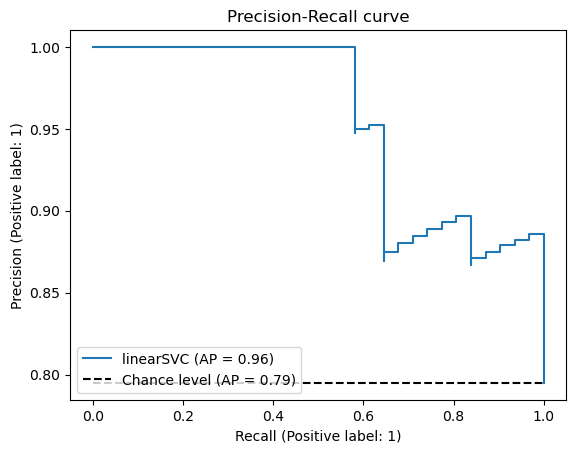

In [25]:
display = PrecisionRecallDisplay.from_estimator(
    suvmac, X_test, Y_test, name="linearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

# Training Model 2: Logistics Regression Model

In [26]:
logreg =  LogisticRegression()

In [27]:
logreg.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation And Accuracy Score

In [28]:
# accuracy on training data
X_train_prediction = logreg.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [29]:
print("accuracy on training data : ", training_data_accuracy * 100)

accuracy on training data :  87.82051282051282


In [30]:
# accuracy on testing data
X_test_prediction = logreg.predict(X_test)
test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction,)

In [31]:
print("accuracy on test data : ", test_data_accuracy2 * 100)

accuracy on test data :  87.17948717948718


In [32]:
cr2 = logreg.predict(X_test)
print(classification_report(Y_test, cr2))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



# Training Model 3: Random Forest Classifier

In [33]:
ranfor =  RandomForestClassifier()

In [34]:
ranfor.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation And Accuracy Score

In [35]:
# accuracy on training data
X_train_prediction = ranfor.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [36]:
print('Accuracy score of training data : ', training_data_accuracy * 100)

Accuracy score of training data :  100.0


In [37]:
# accuracy score in testing data
X_test_prediction = ranfor.predict(X_test)
test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction)

In [38]:
print('Accuracy score of test data : ', test_data_accuracy3 * 100)

Accuracy score of test data :  82.05128205128204


In [39]:
cr3 = ranfor.predict(X_test)
print(classification_report(Y_test, cr3))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



# Training Model 4: Naive Bayes Algorithm

In [40]:
nabay = GaussianNB()

In [41]:
nabay.fit(X_train, Y_train)

GaussianNB()

# Model Evaluation And Accuracy Score

In [42]:
# accuracy on training data
X_train_prediction = nabay.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [43]:
print('Accuracy score of training data : ', training_data_accuracy * 100)

Accuracy score of training data :  73.71794871794873


In [44]:
# accuracy score in test data
X_test_prediction = nabay.predict(X_test)
test_data_accuracy4 = accuracy_score(Y_test, X_test_prediction)

In [45]:
print('Accuracy score of test data : ', test_data_accuracy4 * 100)

Accuracy score of test data :  58.97435897435898


In [46]:
cr4 = logreg.predict(X_test)
print(classification_report(Y_test, cr4))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



In [47]:
# comparing accuracies of all the algorithms for parkinson's disease prediction

models_names = [suvmac, logreg, ranfor, nabay]

models_accuracy = [test_data_accuracy1, test_data_accuracy2, test_data_accuracy3, test_data_accuracy4]

for i in range(4):
    print(f'{models_names[i]}')
    print('Accuracy of the model: ')
    print(f'{models_accuracy[i]}')
    print()

SVC(kernel='linear')
Accuracy of the model: 
0.8717948717948718

LogisticRegression()
Accuracy of the model: 
0.8717948717948718

RandomForestClassifier()
Accuracy of the model: 
0.8205128205128205

GaussianNB()
Accuracy of the model: 
0.5897435897435898



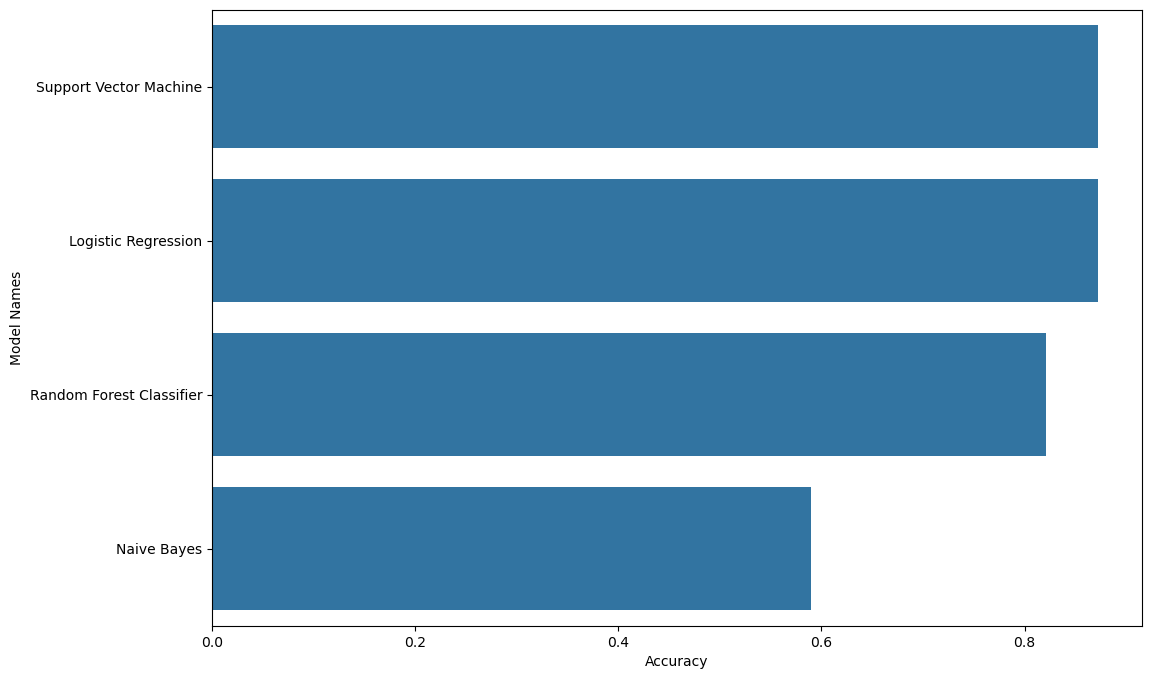

In [48]:
# Comparing the Models by Accuracy Score

data = [['Support Vector Machine', test_data_accuracy1], ['Logistic Regression', test_data_accuracy2], ['Random Forest Classifier', test_data_accuracy3],
        ['Naive Bayes', test_data_accuracy4]]
df = pd.DataFrame(data, columns=['Model Names', 'Accuracy'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model Names', data=df)
plt.show()

# Saving the Trained Model

In [49]:
import pickle

In [50]:
filename = 'parkinsons_disease_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [51]:
# Loading the Saved Model

In [52]:
loaded_suvmac = pickle.load(open('parkinsons_disease_model.sav', 'rb'))

In [53]:
# Predictive System for Parkinson's Disease

input_data = (95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362)

# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction3 = loaded_suvmac.predict(input_data_reshaped)
print(prediction3)

if(prediction3[0] == 1):
  print("The person has Parkinsons disease")

else:
  print("The person does not have parkinsons disease")

[1]
The person has Parkinsons disease
